In [1]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import alen, arange
import math
from math import sqrt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import AdaBoostRegressor
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

from sklearn.svm import SVR
#### PLS
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from scipy.signal import savgol_filter
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy.signal import savgol_filter
import seaborn as sns

In [2]:
#BPSO

def pls_optimise_components(X, y, npc):
 
    rmsecv = np.zeros(npc)
    for i in range(1,npc+1,1):
 
        # Simple PLS
        pls_simple = PLSRegression(n_components=i)
        # Fit
        pls_simple.fit(X, y)
        #cv = LeaveOneOut()
        cv=10
        # Cross-validation
        y_cv = cross_val_predict(pls_simple, X, y, cv=cv)
 
        # Calculate scores
        score = r2_score(y, y_cv)
        rmsecv[i-1] = np.sqrt(mean_squared_error(y, y_cv))
 
    # Find the minimum of ther RMSE and its location
    opt_comp, rmsecv_min = np.argmin(rmsecv),  rmsecv[np.argmin(rmsecv)]
 
    return (opt_comp+1, rmsecv_min)

def base_pls(X,y,n_components, return_model=False):
 
    # Simple PLS
    pls_simple = PLSRegression(n_components=n_components)
    # Fit
    pls_simple.fit(X, y)
    cv = 10
    # Cross-validation
    y_cv = cross_val_predict(pls_simple, X, y, cv=cv)
 
    # Calculate scores
    score = r2_score(y, y_cv)
    rmsecv = np.sqrt(mean_squared_error(y, y_cv))
 
    if return_model == False:
        return(y_cv, score, rmsecv)
    else:
        return(y_cv, score, rmsecv, pls_simple)
    
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# Create an instance 
#reg = linear_model.LinearRegression

# Define objective function
def f_per_particle(m, alpha):
    total_features = dimensions
    # Get the subset of the features from the binary mask

    if np.count_nonzero(m) == 0:
        X_subset = X_train
    else:
        X_subset = X_train[:,m==1]


    opt_comp, rmsecv_min = pls_optimise_components(X_subset, y_train_moisture, 8)
    predicted, r2cv, rmscv = base_pls(X_subset, y_train_moisture, opt_comp)
    
    P = r2cv

    # Compute for the objective function
    j = (alpha * (1.0 - P)
        + (1.0 - alpha) * (1 - (X_subset.shape[1] / total_features)))

    return j

def f(x, alpha=0.88):

    n_particles = x.shape[0]
    j = [f_per_particle(x[i], alpha) for i in range(n_particles)]
    return np.array(j)

def snv(input_data):
  
    # Define a new array and populate it with the corrected data  
    output_data = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
 
        # Apply correction
        output_data[i,:] = (input_data[i,:] - np.mean(input_data[i,:])) / np.std(input_data[i,:])
 
    return output_data

In [3]:
df = pd.read_csv('../Data/Wheat/Wheat_mean_NIR_data_65_samples.csv')

In [4]:
df.head()

,Sample,Batch,Order,TP,CUPRAC,FRAP,TMA,Moisture,Protein,999.8970106,...,2478.712814,2481.08483,2483.461389,2485.842505,2488.227573,2490.617843,2493.012709,2495.412185,2497.816284,2500.22502
0,W1,1,1,177.256315,366.709718,56.286815,0.000000,10.1,13.904338,0.264490,...,0.993593,0.996831,0.998601,1.000223,1.001534,1.001571,1.002851,1.004485,1.004250,1.002066
1,W2,1,2,153.408515,290.123902,53.543083,2.511161,8.7,14.786418,0.283164,...,1.031166,1.033582,1.035195,1.037318,1.038840,1.038373,1.038098,1.039568,1.039971,1.039888
2,W3,1,3,167.788770,433.513709,54.841090,0.235243,10.4,12.500000,0.276600,...,1.048032,1.050699,1.051539,1.053081,1.054179,1.054097,1.053567,1.053987,1.054386,1.052976
3,W4,1,4,161.171271,281.405362,57.062854,9.228084,11.6,14.819005,0.284350,...,1.066802,1.069377,1.071662,1.075393,1.077126,1.075814,1.075846,1.076120,1.076186,1.076950
4,W5,1,5,143.785691,309.539558,55.627153,0.590040,10.9,16.722783,0.294623,...,1.007914,1.010732,1.012537,1.013475,1.015025,1.014866,1.015861,1.016620,1.016702,1.016687


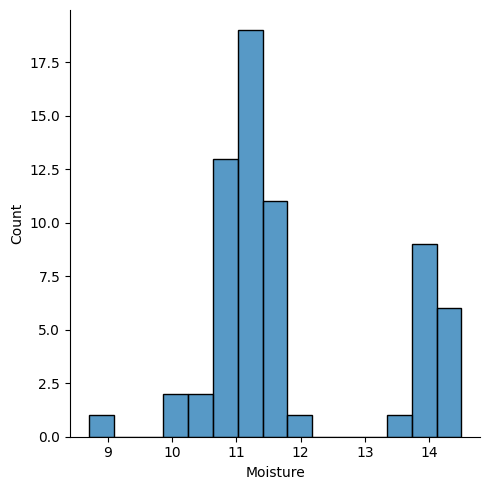

In [5]:
sns.displot(df['Moisture'])

In [6]:
x_feature = df.columns[9:].to_numpy().astype(float)

In [7]:
x_feature = np.round(x_feature,decimals = 1)

array([ 999.9, 1000.3, 1000.7, ..., 2495.4, 2497.8, 2500.2])

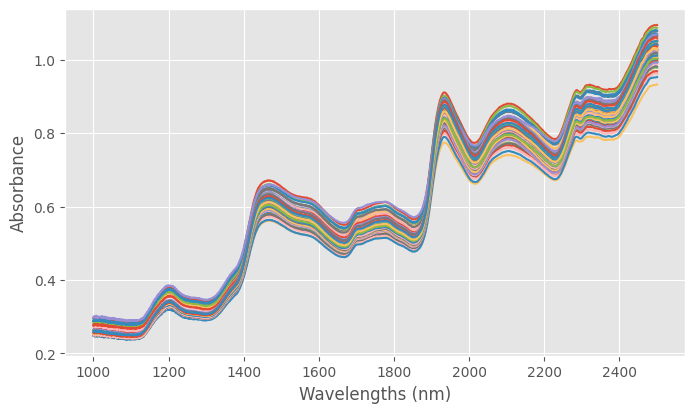

In [8]:
wl = np.arange(0, 1557, 1)
plt.figure(figsize=(8, 4.5))
with plt.style.context('ggplot'):
    plt.plot(x_feature, df.iloc[:,9:].values.T)
    plt.xlabel("Wavelengths (nm)")
    plt.ylabel("Absorbance")
    plt.show()

In [9]:
df_pretreat = df.iloc[:,9:]
df_pretreat['Moisture'] = df['Moisture']
df_pretreat['Protein'] = df['Protein']
df_pretreat['class'] = df_pretreat['Moisture'].astype(int)


for index, row in df_pretreat.iterrows():
    if row['Moisture']< 10.2:
        df_pretreat.loc[index, 'class'] = 8


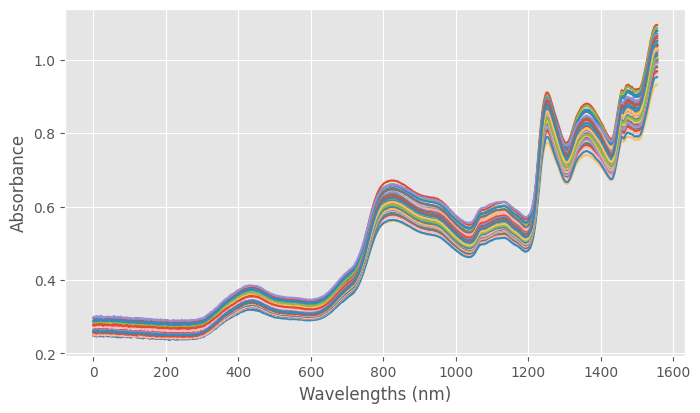

In [10]:
wl = np.arange(0, 1557, 1)
plt.figure(figsize=(8, 4.5))
with plt.style.context('ggplot'):
    plt.plot(wl, df_pretreat.iloc[:,:-3].values.T)
    plt.xlabel("Wavelengths (nm)")
    plt.ylabel("Absorbance")
    plt.show()

In [11]:
y = df_pretreat[['Moisture','Protein','class']]
## Do not take the reference value and the class
X = df_pretreat.values[:, :-3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0,stratify=y['class'])


y_train_moisture = y_train['Moisture']
y_test_moisture = y_test['Moisture']


In [12]:
###Data preprocessing

X_train = snv(X_train)
X_test = snv(X_test)

X_train = savgol_filter(X_train, 3, polyorder=2, deriv=1)
X_test = savgol_filter(X_test, 3, polyorder=2, deriv=1)

In [ ]:
# Import PySwarms
import pyswarms as ps

# Initialize swarm, arbitrary
options = {'c1': 2, 'c2': 2, 'w':1, 'k': 20, 'p':1}

# Call instance of PSO
dimensions = X_train.shape[1] # dimensions should be the number of features
optimizer = ps.discrete.BinaryPSO(n_particles=30, dimensions=dimensions, options=options)
l_col=[]
best = 10
best1 = 15
n=0
while best < best1 :
    
        if n >0 :
            if n >1 :
                ## Get the selected features at iteration i-1
                X_train1 = (np.delete(X_train1, m_array1,1))
                X_test1 = (np.delete(X_test1, m_array1,1))
                wl_list1 = np.delete(wl_list1, m_array1)
                m_array1 = m_array
            if n ==1 :
                X_train1 = X_train
                X_test1 = X_test
                m_array1 = m_array

            ## Get the selected features at iteration i
            X_train = (np.delete(X_train, m_array,1))
            X_test = (np.delete(X_test, m_array,1))
            dimensions = X_train.shape[1]
            options = {'c1': 2, 'c2': 2, 'w':1, 'k': 20, 'p':1}
            optimizer = ps.discrete.BinaryPSO(n_particles=30, dimensions=dimensions, options=options)
            best1 = best
            ##Save the selected features at iteration i-1
            

        if X_train.shape[1] < 20:
            break

        # Perform optimization
        cost, pos = optimizer.optimize(f, iters=100, verbose=2)
        optimizer.reset()
        best = round(cost,3)
        print(best)            
        m_array = np.where(pos == 0)
        print(X_train.shape)
        print(n)
        wl_list = np.delete(wl_list, m_array)
        n +=1  
        

In [ ]:
ls_score_pls = []
n_opt = 8
for i in range(3,9):
    pls_simple = PLSRegression(n_components=i)
    cv = LeaveOneOut()
    #cv = 10

    X1 = X_train1 
    #X1 = X_train[:,pos==1] 

    X2 = X_test1
    #X2 = X_test[:,pos==1] 


    # Fit
    pls_simple.fit(X1, y_train_moisture)


    # Cross-validation
    y_cv = cross_val_predict(pls_simple,X1, y_train_moisture, cv=cv)
    y_pred = pls_simple.predict(X2)
    score = r2_score(y_train_moisture, y_cv)
    if ls_score_pls:
        if score< ls_score_pls[-1] and i>4:
            n_opt =  i-1
            break

    ls_score_pls.append(score)

pls_simple = PLSRegression(n_components=n_opt)
cv = LeaveOneOut()
# cv = 10

X1 = X_train1 
#X1 = X_train[:,pos==1] 

X2 = X_test1
#X2 = X_test[:,pos==1] 
X = np.concatenate((X_train1, X_test1))
y = pd.concat([y_train, y_test], axis=0)
#y = np.concatenate((y_train, y_test))

# Fit
pls_simple.fit(X1, y_train_moisture)


# Cross-validation
y_cv = cross_val_predict(pls_simple,X1, y_train_moisture, cv=cv)
y_pred = pls_simple.predict(X2)
y_pred_tot = pls_simple.predict(X)
# Calculate scores
score = r2_score(y_train_moisture, y_cv)
score_train = mean_squared_error(y_train_moisture, y_cv,squared=False)
score_test = mean_squared_error(y_test_moisture, y_pred,squared=False)

score_tot = r2_score(y['Moisture'], y_pred_tot)
score_rmse_tot = mean_squared_error(y['Moisture'], y_pred_tot,squared=False)

print('N comp: ', n_opt)
print('N Wave: ', X_train1.shape)
print('R2CV: ', score)
print('RMSECV: ', score_train)
print('RMSE test: ', score_test)


print('Pour comparaison')
print('R2: ', score_tot)
print('RMSE: ', score_rmse_tot)

